# Growth rates testing after the addition of hydrogen peroxide (0.1 -1 mM)



Growth rate analysis of S. pombe SB3 cells after exposure to hydrogen peroxide.

For our western blotting experiments we tracked the Pap1 protein for 2 hours after exposure to H2O2. Particularly for H2O2 concentrations of 500um and 1mM as we observed Pap1 oxidation over this time period. A concern is that at the 2hr mark the cells may be dividing and therefore the observation of Pap1 oxidation may be a result of growth effects. It is generally accepted that S. pombe wildtype cells divide every 2hrs in rich medium and every 3hrs in minimal media. From this we kept our analysis to a max of 2hrs. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sp
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import os
%pylab inline
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
from matplotlib.pyplot import figure

#import plotly.graph_objects as go
#import plotly.express as px
backupdir = os.getcwd()
os.chdir(backupdir)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("growth curve_2.xlsx", sheet_name='WT_0H2O2')
read_file.to_csv ("WT_0H2O2.csv", index = None,header=True)
WT_0H2O2 = pd.DataFrame(pd.read_csv("WT_0H2O2.csv"))

#First need to calculate the average OD reading from the three replications
WT_0H2O2['Average OD'] = (WT_0H2O2.iloc[:, [1,2,3]].mean(axis=1))
col_name5="Average OD"
fifth_col = WT_0H2O2.pop(col_name5)
WT_0H2O2.insert(4, col_name5, fifth_col)

#To calculate the doubling time we need the gradient of the slope. First do this by plotting a log vs time graph.
#Note that in pandas log=ln and log10 is standard
WT_0H2O2['Ln Average OD'] = np.log(WT_0H2O2['Average OD'])
col_name6="Ln Average OD"
sixth_col = WT_0H2O2.pop(col_name6)
WT_0H2O2.insert(5, col_name6, sixth_col)

#Standard errors are calculated to plot error bars
WT_0H2O2['Std error OD'] = WT_0H2O2.iloc[:, [1,2,3]].sem(axis=1)
col_name7="Std error OD"
seventh_col = WT_0H2O2.pop(col_name7)
WT_0H2O2.insert(6, col_name7, seventh_col)

#Also calculated the standard deviation for use in the t-test
WT_0H2O2['Std OD'] = WT_0H2O2.iloc[:, [1,2,3]].std(axis=1)
col_name8="Std OD"
eight_col = WT_0H2O2.pop(col_name8)
WT_0H2O2.insert(7, col_name8, eight_col)


WT_0H2O2.round(3)

#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("growth curve_2.xlsx", sheet_name='H2O2100um')
read_file.to_csv ("H2O2100um.csv", index = None,header=True)
H2O2100um = pd.DataFrame(pd.read_csv("H2O2100um.csv"))


#First need to calculate the average OD reading from the three replications
H2O2100um['Average OD'] = (H2O2100um.iloc[:, [1,2,3]].mean(axis=1))
col_name5="Average OD"
fifth_col = H2O2100um.pop(col_name5)
H2O2100um.insert(4, col_name5, fifth_col)

#To calculate the doubling time we need the gradient of the slope. First do this by plotting a log vs time graph.
#Note that in pandas log=ln and log10 is standard
H2O2100um['Ln Average OD'] = np.log(H2O2100um['Average OD'])
col_name6="Ln Average OD"
sixth_col = H2O2100um.pop(col_name6)
H2O2100um.insert(5, col_name6, sixth_col)

#Standard errors are calculated to plot error bars
H2O2100um['Std error OD'] = H2O2100um.iloc[:, [1,2,3]].sem(axis=1)
col_name7="Std error OD"
seventh_col = H2O2100um.pop(col_name7)
H2O2100um.insert(6, col_name7, seventh_col)

#Also calculated the standard deviation for use in the t-test
H2O2100um['Std OD'] = H2O2100um.iloc[:, [1,2,3]].std(axis=1)
col_name8="Std OD"
eight_col = H2O2100um.pop(col_name8)
H2O2100um.insert(7, col_name8, eight_col)


H2O2100um.round(3)

#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("growth curve_2.xlsx", sheet_name='H2O2200um')
read_file.to_csv ("H2O2200um.csv", index = None,header=True)
H2O2200um = pd.DataFrame(pd.read_csv("H2O2200um.csv"))


#First need to calculate the average OD reading from the three replications
H2O2200um['Average OD'] = (H2O2200um.iloc[:, [1,2,3]].mean(axis=1))
col_name5="Average OD"
fifth_col = H2O2200um.pop(col_name5)
H2O2200um.insert(4, col_name5, fifth_col)

#To calculate the doubling time we need the gradient of the slope. First do this by plotting a log vs time graph.
#Note that in pandas log=ln and log10 is standard
H2O2200um['Ln Average OD'] = np.log(H2O2200um['Average OD'])
col_name6="Ln Average OD"
sixth_col = H2O2200um.pop(col_name6)
H2O2200um.insert(5, col_name6, sixth_col)

#Standard errors are calculated to plot error bars
H2O2200um['Std error OD'] = H2O2200um.iloc[:, [1,2,3]].sem(axis=1)
col_name7="Std error OD"
seventh_col = H2O2200um.pop(col_name7)
H2O2200um.insert(6, col_name7, seventh_col)

#Also calculated the standard deviation for use in the t-test
H2O2200um['Std OD'] = H2O2200um.iloc[:, [1,2,3]].std(axis=1)
col_name8="Std OD"
eight_col = H2O2200um.pop(col_name8)
H2O2200um.insert(7, col_name8, eight_col)


H2O2200um.round(3)

#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("growth curve_2.xlsx", sheet_name='H2O2500um')
read_file.to_csv ("H2O2500um.csv", index = None,header=True)
H2O2500um = pd.DataFrame(pd.read_csv("H2O2500um.csv"))


#First need to calculate the average OD reading from the three replications
H2O2500um['Average OD'] = (H2O2500um.iloc[:, [1,2,3]].mean(axis=1))
col_name5="Average OD"
fifth_col = H2O2500um.pop(col_name5)
H2O2500um.insert(4, col_name5, fifth_col)

#To calculate the doubling time we need the gradient of the slope. First do this by plotting a log vs time graph.
#Note that in pandas log=ln and log10 is standard
H2O2500um['Ln Average OD'] = np.log(H2O2500um['Average OD'])
col_name6="Ln Average OD"
sixth_col = H2O2500um.pop(col_name6)
H2O2500um.insert(5, col_name6, sixth_col)

#Standard errors are calculated to plot error bars
H2O2500um['Std error OD'] = H2O2500um.iloc[:, [1,2,3]].sem(axis=1)
col_name7="Std error OD"
seventh_col = H2O2500um.pop(col_name7)
H2O2500um.insert(6, col_name7, seventh_col)

#Also calculated the standard deviation for use in the t-test
H2O2500um['Std OD'] = H2O2500um.iloc[:, [1,2,3]].std(axis=1)
col_name8="Std OD"
eight_col = H2O2500um.pop(col_name8)
H2O2500um.insert(7, col_name8, eight_col)


H2O2500um.round(3)

#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("growth curve_2.xlsx", sheet_name='H2O21mM')
read_file.to_csv ("H2O21mM.csv", index = None,header=True)
H2O21mM = pd.DataFrame(pd.read_csv("H2O21mM.csv"))


#First need to calculate the average OD reading from the three replications
H2O21mM['Average OD'] = (H2O21mM.iloc[:, [1,2,3]].mean(axis=1))
col_name5="Average OD"
fifth_col = H2O21mM.pop(col_name5)
H2O21mM.insert(4, col_name5, fifth_col)

#To calculate the doubling time we need the gradient of the slope. First do this by plotting a log vs time graph.
#Note that in pandas log=ln and log10 is standard
H2O21mM['Ln Average OD'] = np.log(H2O21mM['Average OD'])
col_name6="Ln Average OD"
sixth_col = H2O21mM.pop(col_name6)
H2O21mM.insert(5, col_name6, sixth_col)

#Standard errors are calculated to plot error bars
H2O21mM['Std error OD'] = H2O21mM.iloc[:, [1,2,3]].sem(axis=1)
col_name7="Std error OD"
seventh_col = H2O21mM.pop(col_name7)
H2O21mM.insert(6, col_name7, seventh_col)

#Also calculated the standard deviation for use in the t-test
H2O21mM['Std OD'] = H2O21mM.iloc[:, [1,2,3]].std(axis=1)
col_name8="Std OD"
eight_col = H2O21mM.pop(col_name8)
H2O21mM.insert(7, col_name8, eight_col)


H2O21mM.round(3)

,TIME HRS,Rep1,Rep2,Rep3,Average OD,Ln Average OD,Std error OD,Std OD
0,0.0,0.163,0.143,0.159,0.155,-1.864,0.006,0.011
1,3.0,0.268,0.256,0.263,0.262,-1.338,0.003,0.006
2,5.0,0.402,0.377,0.397,0.392,-0.936,0.008,0.013
3,5.5,0.457,0.447,0.506,0.470,-0.755,0.018,0.032
4,6.0,0.503,0.462,0.513,0.493,-0.708,0.016,0.027
5,6.5,0.508,0.470,0.516,0.498,-0.697,0.014,0.025
6,7.0,0.514,0.474,0.530,0.506,-0.681,0.017,0.029
7,7.5,0.538,0.496,0.541,0.525,-0.644,0.015,0.025
8,8.5,0.573,0.523,0.564,0.553,-0.592,0.015,0.027
9,10.5,0.544,0.525,0.566,0.545,-0.607,0.012,0.021


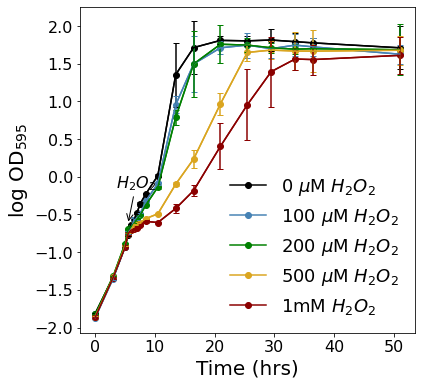

In [3]:
fig, ax1 = plt.subplots(figsize=(6,6))

x1 = WT_0H2O2['TIME HRS']
y1 = WT_0H2O2['Ln Average OD']
y1error = WT_0H2O2['Std error OD'] 



x2 = H2O2100um['TIME HRS']
y2 = H2O2100um['Ln Average OD']
y2error = H2O2100um['Std error OD'] 


x3 = H2O2200um['TIME HRS']
y3 = H2O2200um['Ln Average OD']
y3error = H2O2200um['Std error OD'] 


x4 = H2O2500um['TIME HRS']
y4 = H2O2500um['Ln Average OD']
y4error = H2O2500um['Std error OD'] 


x5 = H2O21mM['TIME HRS']
y5 = H2O21mM['Ln Average OD']
y5error = H2O21mM['Std error OD'] 



plt.plot(x1,y1, color='black', marker = 'o', label='0 $\mu$M $H_{2}O_{2}$')
plt.plot(x2,y2, color='steelblue', marker = 'o', label='100 $\mu$M $H_{2}O_{2}$')
plt.plot(x3,y3, color='green', marker= 'o', label='200 $\mu$M $H_{2}O_{2}$')
plt.plot(x4,y4, color='goldenrod', marker= 'o', label='500 $\mu$M $H_{2}O_{2}$')
plt.plot(x5,y5, color='darkred', marker= 'o', label='1mM $H_{2}O_{2}$')

plt.errorbar(x1,y1,yerr=y1error, color='black', capsize=3)
plt.errorbar(x2,y2,yerr=y2error, color='steelblue', capsize=3)
plt.errorbar(x3,y3,yerr=y3error, color='green', capsize=3)
plt.errorbar(x4,y4,yerr=y4error, color='goldenrod', capsize=3)
plt.errorbar(x5,y5,yerr=y5error, color='darkred', capsize=3)



ax1.set_ylabel(r'log OD$_{595}$', size=20)
ax1.set_xlabel(r'Time (hrs)', size=20)
ax1.annotate("$H_{2}O_{2}$",xy=(5.5, -0.62), xycoords='data', xytext=(3.5,-0.15),size=16, textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), )
ax1.tick_params(axis='both', which='major', labelsize=16)
plt.legend(['0 $\mu$M $H_{2}O_{2}$','100 $\mu$M $H_{2}O_{2}$', '200 $\mu$M $H_{2}O_{2}$', '500 $\mu$M $H_{2}O_{2}$', '1mM $H_{2}O_{2}$'],fontsize=18, frameon=False)
plt.savefig('Growth curve_EM', dpi=400)
plt.show()


In [4]:
#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("growth curve_2.xlsx", sheet_name='WT_0H2O2C')
read_file.to_csv ("WT_0H2O2.csv", index = None,header=True)
WT_0H2O2 = pd.DataFrame(pd.read_csv("WT_0H2O2.csv"))

#First need to calculate the average OD reading from the three replications
WT_0H2O2['Average cfu/ml'] = (WT_0H2O2.iloc[:, [1,2,3]].mean(axis=1))
col_name5="Average cfu/ml"
fifth_col = WT_0H2O2.pop(col_name5)
WT_0H2O2.insert(4, col_name5, fifth_col)


#Standard errors are calculated to plot error bars
WT_0H2O2['Std error cfu/ml'] = WT_0H2O2.iloc[:, [1,2,3]].sem(axis=1)
col_name6="Std error cfu/ml"
seventh_col = WT_0H2O2.pop(col_name6)
WT_0H2O2.insert(5, col_name6, sixth_col)

#Also calculated the standard deviation for use in the t-test
WT_0H2O2['Std cfu/ml'] = WT_0H2O2.iloc[:, [1,2,3]].std(axis=1)
col_name7="Std cfu/ml"
seventh_col = WT_0H2O2.pop(col_name7)
WT_0H2O2.insert(6, col_name7, seventh_col)

#WT_0H2O2.drop([0,1,2], axis=0, inplace=True)

WT_0H2O2.round(3)

#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("growth curve_2.xlsx", sheet_name='H2O2100umC')
read_file.to_csv ("H2O2100um.csv", index = None,header=True)
H2O2100um = pd.DataFrame(pd.read_csv("H2O2100um.csv"))

#First need to calculate the average OD reading from the three replications
H2O2100um['Average cfu/ml'] = (H2O2100um.iloc[:, [1,2,3]].mean(axis=1))
col_name5="Average cfu/ml"
fifth_col = H2O2100um.pop(col_name5)
H2O2100um.insert(4, col_name5, fifth_col)


#Standard errors are calculated to plot error bars
H2O2100um['Std error cfu/ml'] = H2O2100um.iloc[:, [1,2,3]].sem(axis=1)
col_name6="Std error cfu/ml"
seventh_col = H2O2100um.pop(col_name6)
H2O2100um.insert(5, col_name6, sixth_col)

#Also calculated the standard deviation for use in the t-test
H2O2100um['Std cfu/ml'] = H2O2100um.iloc[:, [1,2,3]].std(axis=1)
col_name7="Std cfu/ml"
seventh_col = H2O2100um.pop(col_name7)
H2O2100um.insert(6, col_name7, seventh_col)

#H2O2100um.drop([0,1,2], axis=0, inplace=True)

H2O2100um.round(3)

#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("growth curve_2.xlsx", sheet_name='H2O2200umC')
read_file.to_csv ("H2O2200um.csv", index = None,header=True)
H2O2200um = pd.DataFrame(pd.read_csv("H2O2200um.csv"))

#First need to calculate the average OD reading from the three replications
H2O2200um['Average cfu/ml'] = (H2O2200um.iloc[:, [1,2,3]].mean(axis=1))
col_name5="Average cfu/ml"
fifth_col = H2O2200um.pop(col_name5)
H2O2200um.insert(4, col_name5, fifth_col)


#Standard errors are calculated to plot error bars
H2O2200um['Std error cfu/ml'] = H2O2200um.iloc[:, [1,2,3]].sem(axis=1)
col_name6="Std error cfu/ml"
seventh_col = H2O2200um.pop(col_name6)
H2O2200um.insert(5, col_name6, sixth_col)

#Also calculated the standard deviation for use in the t-test
H2O2200um['Std cfu/ml'] = H2O2200um.iloc[:, [1,2,3]].std(axis=1)
col_name7="Std cfu/ml"
seventh_col = H2O2200um.pop(col_name7)
H2O2200um.insert(6, col_name7, seventh_col)

#H2O2200um.drop([0,1,2], axis=0, inplace=True)

H2O2200um.round(3)

#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("growth curve_2.xlsx", sheet_name='H2O2500umC')
read_file.to_csv ("H2O2500um.csv", index = None,header=True)
H2O2500um = pd.DataFrame(pd.read_csv("H2O2500um.csv"))

#First need to calculate the average OD reading from the three replications
H2O2500um['Average cfu/ml'] = (H2O2500um.iloc[:, [1,2,3]].mean(axis=1))
col_name5="Average cfu/ml"
fifth_col = H2O2500um.pop(col_name5)
H2O2500um.insert(4, col_name5, fifth_col)


#Standard errors are calculated to plot error bars
H2O2500um['Std error cfu/ml'] = H2O2500um.iloc[:, [1,2,3]].sem(axis=1)
col_name6="Std error cfu/ml"
seventh_col = H2O2500um.pop(col_name6)
H2O2500um.insert(5, col_name6, sixth_col)

#Also calculated the standard deviation for use in the t-test
H2O2500um['Std cfu/ml'] = H2O2500um.iloc[:, [1,2,3]].std(axis=1)
col_name7="Std cfu/ml"
seventh_col = H2O2500um.pop(col_name7)
H2O2500um.insert(6, col_name7, seventh_col)

#H2O2500um.drop([0,1,2], axis=0, inplace=True)

H2O2500um.round(3)

#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("growth curve_2.xlsx", sheet_name='H2O21mMC')
read_file.to_csv ("H2O21mM.csv", index = None,header=True)
H2O21mM = pd.DataFrame(pd.read_csv("H2O21mM.csv"))

#First need to calculate the average OD reading from the three replications
H2O21mM['Average cfu/ml'] = (H2O21mM.iloc[:, [1,2,3]].mean(axis=1))
col_name5="Average cfu/ml"
fifth_col = H2O21mM.pop(col_name5)
H2O21mM.insert(4, col_name5, fifth_col)


#Standard errors are calculated to plot error bars
H2O21mM['Std error cfu/ml'] = H2O21mM.iloc[:, [1,2,3]].sem(axis=1)
col_name6="Std error cfu/ml"
seventh_col = H2O21mM.pop(col_name6)
H2O21mM.insert(5, col_name6, sixth_col)

#Also calculated the standard deviation for use in the t-test
H2O21mM['Std cfu/ml'] = H2O21mM.iloc[:, [1,2,3]].std(axis=1)
col_name7="Std cfu/ml"
seventh_col = H2O21mM.pop(col_name7)
H2O21mM.insert(6, col_name7, seventh_col)

#H2O21mM.drop([0,1,2], axis=0, inplace=True)

H2O21mM.round(3)


,Time (Hrs),cfu/ml Rep 1,cfu/ml Rep 2,cfu/ml Rep 3,Average cfu/ml,Std error cfu/ml,Std cfu/ml
0,0,2600000,2440000,2840000,2626666.667,-1.864,201328.918
1,1,2960000,2920000,2760000,2880000.000,-1.338,105830.052
2,2,2360000,2600000,2360000,2440000.000,-0.936,138564.065
3,3,2920000,2840000,2280000,2680000.000,-0.755,348711.915
4,5,3800000,3040000,3440000,3426666.667,-0.708,380175.398


In [5]:
# Display raw tabulated table for each dataset
print("WT_0H2O2:")
print(WT_0H2O2.round(3))

print("\nH2O2100um:")
print(H2O2100um.round(3))

print("\nH2O2200um:")
print(H2O2200um.round(3))

print("\nH2O2500um:")
print(H2O2500um.round(3))

print("\nH2O21mM:")
print(H2O21mM.round(3))


WT_0H2O2:
   Time (Hrs)  cfu/ml Rep 1  cfu/ml Rep 2  cfu/ml Rep 3  Average cfu/ml  \
0           0       2910000       2800000       2960000     2890000.000   
1           1       2920000       2670000       2920000     2836666.667   
2           2       2600000       2780000       2760000     2713333.333   
3           3       2680000       2700000       2920000     2766666.667   
4           5       3140000       3080000       3040000     3086666.667   

   Std error cfu/ml  Std cfu/ml  
0            -1.864   81853.528  
1            -1.338  144337.567  
2            -0.936   98657.657  
3            -0.755  133166.562  
4            -0.708   50332.230  

H2O2100um:
   Time (Hrs)  cfu/ml Rep 1  cfu/ml Rep 2  cfu/ml Rep 3  Average cfu/ml  \
0           0       2060000       2440000       2960000     2486666.667   
1           1       2620000       2580000       2040000     2413333.333   
2           2       2420000       2720000       2120000     2420000.000   
3           3       276

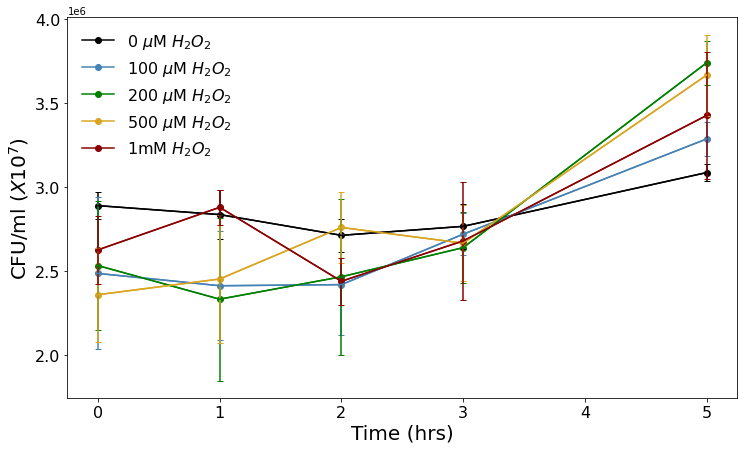

In [6]:
fig, ax1 = plt.subplots(figsize=(12,7))

x1 = WT_0H2O2['Time (Hrs)']
y1 = WT_0H2O2['Average cfu/ml']
y1error = WT_0H2O2['Std cfu/ml'] 



x2 = H2O2100um['Time (Hrs)']
y2 = H2O2100um['Average cfu/ml']
y2error = H2O2100um['Std cfu/ml'] 


x3 = H2O2200um['Time (Hrs)']
y3 = H2O2200um['Average cfu/ml']
y3error = H2O2200um['Std cfu/ml'] 


x4 = H2O2500um['Time (Hrs)']
y4 = H2O2500um['Average cfu/ml']
y4error = H2O2500um['Std cfu/ml'] 


x5 = H2O21mM['Time (Hrs)']
y5 = H2O21mM['Average cfu/ml']
y5error = H2O21mM['Std cfu/ml'] 



plt.plot(x1,y1, color='black', marker = 'o', label='0 $\mu$M $H_{2}O_{2}$')
plt.plot(x2,y2, color='steelblue', marker = 'o', label='100 $\mu$M $H_{2}O_{2}$')
plt.plot(x3,y3, color='green', marker= 'o', label='200 $\mu$M $H_{2}O_{2}$')
plt.plot(x4,y4, color='goldenrod', marker= 'o', label='500 $\mu$M $H_{2}O_{2}$')
plt.plot(x5,y5, color='darkred', marker= 'o', label='1mM $H_{2}O_{2}$')

plt.errorbar(x1,y1,yerr=y1error, color='black', capsize=3)
plt.errorbar(x2,y2,yerr=y2error, color='steelblue', capsize=3)
plt.errorbar(x3,y3,yerr=y3error, color='green', capsize=3)
plt.errorbar(x4,y4,yerr=y4error, color='goldenrod', capsize=3)
plt.errorbar(x5,y5,yerr=y5error, color='darkred', capsize=3)



ax1.set_ylabel(r'CFU/ml ($X 10^7$)', size=20)
ax1.set_xlabel(r'Time (hrs)', size=20)
ax1.annotate("$H_{2}O_{2}$",xy=(5.5, -0.62), xycoords='data', xytext=(3.5,-0.15), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), )
ax1.tick_params(axis='both', which='major', labelsize=16)
plt.legend(['0 $\mu$M $H_{2}O_{2}$','100 $\mu$M $H_{2}O_{2}$', '200 $\mu$M $H_{2}O_{2}$', '500 $\mu$M $H_{2}O_{2}$', '1mM $H_{2}O_{2}$'],fontsize=16, frameon=False)
plt.savefig('CFU graph', dpi=400)
plt.show()


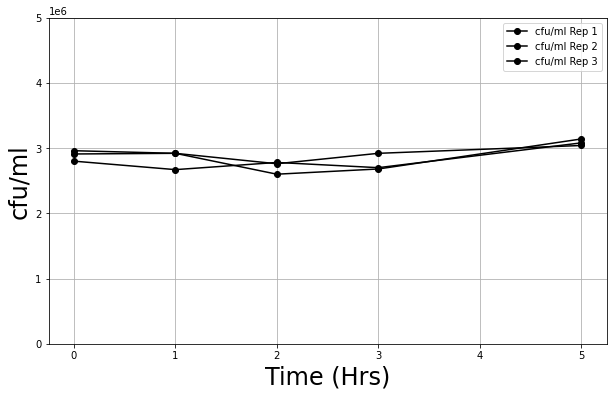

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'cfu/ml Rep 1': [2910000, 2920000, 2600000, 2680000, 3140000],
    'cfu/ml Rep 2': [2800000,2670000, 2780000, 2700000,  3080000],
    'cfu/ml Rep 3': [2960000, 2920000, 2760000, 2920000, 3040000],
}
   
# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    plt.plot(df['Time (Hrs)'], df[col], marker='o', linestyle='-', label=col, color='black')
plt.xlabel('Time (Hrs)', size='24')
plt.ylim(0, 5e6)  # Set y-axis limit
plt.grid(False)   # Remove gridlines
plt.ylabel('cfu/ml', size='24')
#plt.title('cfu/ml Over Time', size='24')
plt.legend()
plt.grid(True)
plt.show()


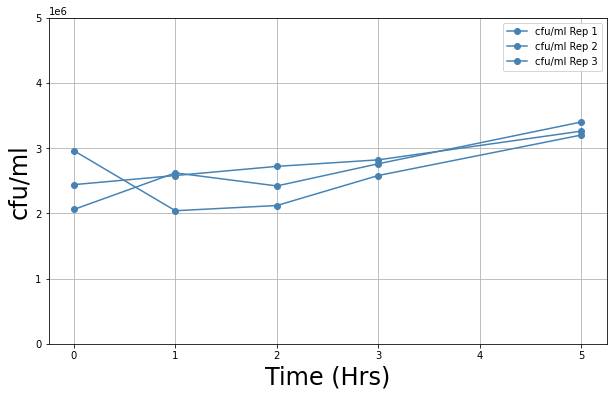

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'cfu/ml Rep 1': [2060000,  2620000, 2420000, 2760000, 3400000],
    'cfu/ml Rep 2': [2440000, 2580000,2720000, 2820000, 3260000],
    'cfu/ml Rep 3': [2960000, 2040000,  2120000,  2580000,  3200000],
}
   
# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    plt.plot(df['Time (Hrs)'], df[col], marker='o', linestyle='-', label=col, color='steelblue')
plt.xlabel('Time (Hrs)', size='24')
plt.ylim(0, 5e6)  # Set y-axis limit
plt.grid(False)   # Remove gridlines
plt.ylabel('cfu/ml', size='24')
#plt.title('cfu/ml Over Time', size='24')
plt.legend()
plt.grid(True)
plt.show()


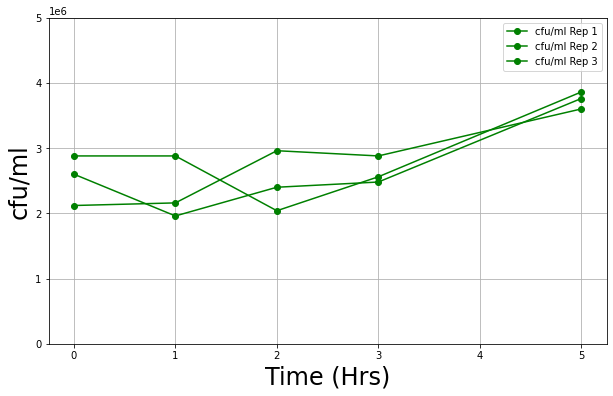

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'cfu/ml Rep 1': [2120000,   2160000, 2960000, 2880000, 3600000],
    'cfu/ml Rep 2': [2600000, 1960000,2400000,  2480000, 3760000],
    'cfu/ml Rep 3': [2880000, 2880000,  2040000, 2560000 , 3860000 ],
}
     
# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    plt.plot(df['Time (Hrs)'], df[col], marker='o', linestyle='-', label=col, color='green')
plt.xlabel('Time (Hrs)', size='24')
plt.ylim(0, 5e6)  # Set y-axis limit
plt.grid(False)   # Remove gridlines
plt.ylabel('cfu/ml', size='24')
#plt.title('cfu/ml Over Time', size='24')
plt.legend()
plt.grid(True)
plt.show()

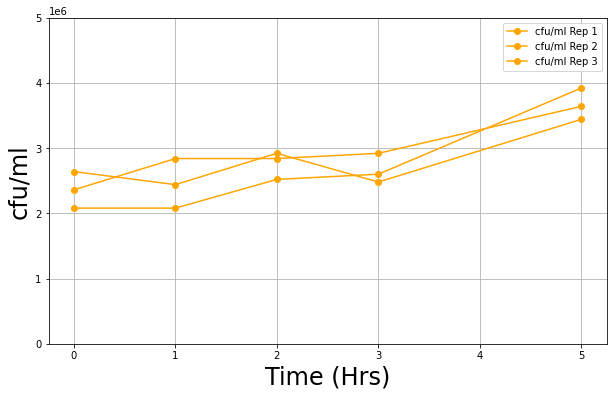

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'cfu/ml Rep 1': [2360000,   2840000, 2840000 , 2920000, 3640000],
    'cfu/ml Rep 2': [2080000, 2080000,2520000,  2600000, 3920000],
    'cfu/ml Rep 3': [2640000,  2440000,  2920000, 2480000 , 3440000  ],
}
        
# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
for i, col in enumerate(df.columns[1:]):
    plt.plot(df['Time (Hrs)'], df[col], marker='o', linestyle='-', label=col, color='orange')
plt.xlabel('Time (Hrs)', size='24')
plt.ylim(0, 5e6)  # Set y-axis limit
plt.grid(False)   # Remove gridlines
plt.ylabel('cfu/ml', size='24')
#plt.title('cfu/ml Over Time', size='24')
plt.legend()
plt.grid(True)
plt.show()

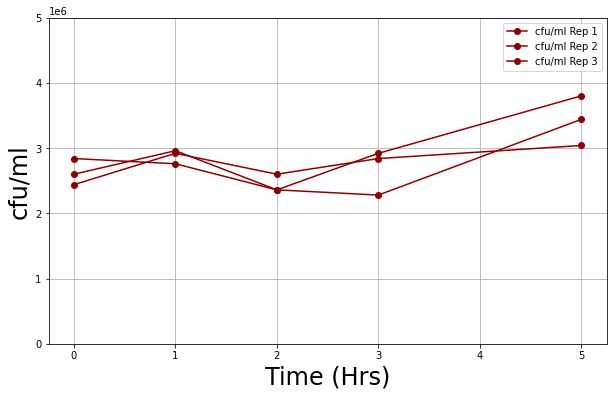

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'cfu/ml Rep 1': [2600000,   2960000, 2360000 , 2920000 , 3800000],
    'cfu/ml Rep 2': [2440000, 2920000, 2600000,  2840000, 3040000],
    'cfu/ml Rep 3': [2840000,  2760000,  2360000, 2280000 ,3440000  ],
}

 
# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    plt.plot(df['Time (Hrs)'], df[col], marker='o', linestyle='-', label=col, color='darkred')
plt.xlabel('Time (Hrs)', size='24')
plt.ylim(0, 5e6)  # Set y-axis limit
plt.grid(False)   # Remove gridlines
plt.ylabel('cfu/ml', size='24')
#plt.title('cfu/ml Over Time', size='24')
plt.legend()
plt.grid(True)
plt.show()

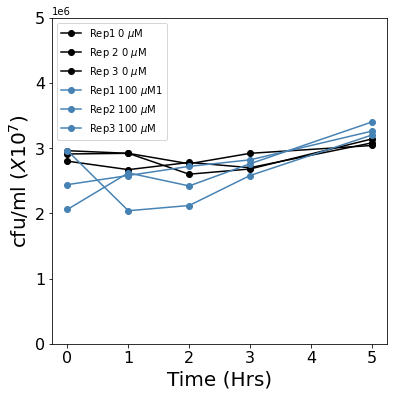

In [12]:


import matplotlib.pyplot as plt
import pandas as pd



# Data for the first plot
data1 = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'Rep1 0 $\mu$M': [2910000, 2920000, 2600000, 2680000, 3140000],
    'Rep 2 0 $\mu$M': [2800000,2670000, 2780000, 2700000,  3080000],
    'Rep 3 0 $\mu$M': [2960000, 2920000, 2760000, 2920000, 3040000],
}
# Data for the second plot
data2 = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'Rep1 100 $\mu$M1': [2060000,  2620000, 2420000, 2760000, 3400000],
    'Rep2 100 $\mu$M': [2440000, 2580000,2720000, 2820000, 3260000],
    'Rep3 100 $\mu$M': [2960000, 2040000,  2120000,  2580000,  3200000],
}



# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Plotting both datasets
plt.figure(figsize=(6, 6))
for col in df1.columns[1:]:
    plt.plot(df1['Time (Hrs)'], df1[col], marker='o', linestyle='-', label=col, color='black')

for col in df2.columns[1:]:
    plt.plot(df2['Time (Hrs)'], df2[col], marker='o', linestyle='-', label=col, color='steelblue')

plt.xlabel('Time (Hrs)', size='20')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(0, 5e6)  # Set y-axis limit
plt.grid(False)   # Remove gridlines
plt.ylabel('cfu/ml ($X 10^7$)', size='20')
plt.legend()
plt.savefig('CFU graph_100uM', dpi=400)
plt.show()

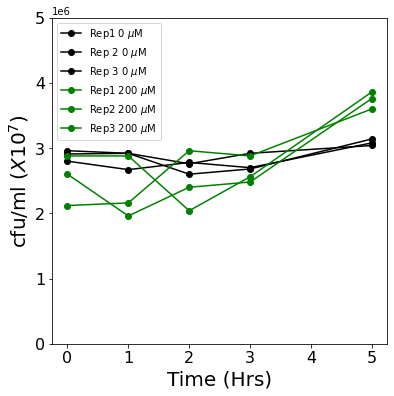

In [13]:

import matplotlib.pyplot as plt
import pandas as pd



# Data for the first plot
data1 = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'Rep1 0 $\mu$M': [2910000, 2920000, 2600000, 2680000, 3140000],
    'Rep 2 0 $\mu$M': [2800000,2670000, 2780000, 2700000,  3080000],
    'Rep 3 0 $\mu$M': [2960000, 2920000, 2760000, 2920000, 3040000],
}
# Data for the second plot
data2 = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'Rep1 200 $\mu$M': [2120000,   2160000, 2960000, 2880000, 3600000],
    'Rep2 200 $\mu$M': [2600000, 1960000,2400000,  2480000, 3760000],
    'Rep3 200 $\mu$M': [2880000, 2880000,  2040000, 2560000 , 3860000 ],
}


# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Plotting both datasets
plt.figure(figsize=(6, 6))
for col in df1.columns[1:]:
    plt.plot(df1['Time (Hrs)'], df1[col], marker='o', linestyle='-', label=col, color='black')

for col in df2.columns[1:]:
    plt.plot(df2['Time (Hrs)'], df2[col], marker='o', linestyle='-', label=col, color='green')

plt.xlabel('Time (Hrs)', size='20')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(0, 5e6)  # Set y-axis limit
plt.grid(False)   # Remove gridlines
plt.ylabel('cfu/ml ($X 10^7$)', size='20')
plt.legend()
plt.savefig('CFU graph_200uM', dpi=400)
plt.show()

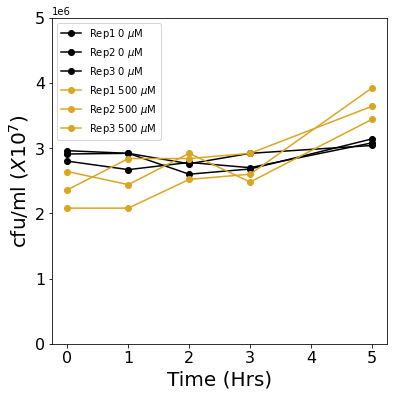

In [14]:
import matplotlib.pyplot as plt
import pandas as pd



# Data for the first plot
data1 = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'Rep1 0 $\mu$M': [2910000, 2920000, 2600000, 2680000, 3140000],
    'Rep2 0 $\mu$M': [2800000,2670000, 2780000, 2700000,  3080000],
    'Rep3 0 $\mu$M': [2960000, 2920000, 2760000, 2920000, 3040000],
}
# Data for the second plot
data2 = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'Rep1 500 $\mu$M': [2360000,   2840000, 2840000 , 2920000, 3640000],
    'Rep2 500 $\mu$M': [2080000, 2080000,2520000,  2600000, 3920000],
    'Rep3 500 $\mu$M': [2640000,  2440000,  2920000, 2480000 , 3440000  ],
}


# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Plotting both datasets
plt.figure(figsize=(6, 6))
for col in df1.columns[1:]:
    plt.plot(df1['Time (Hrs)'], df1[col], marker='o', linestyle='-', label=col, color='black')

for col in df2.columns[1:]:
    plt.plot(df2['Time (Hrs)'], df2[col], marker='o', linestyle='-', label=col, color='goldenrod')

plt.xlabel('Time (Hrs)', size='20')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(0, 5e6)  # Set y-axis limit
plt.grid(False)   # Remove gridlines
plt.ylabel('cfu/ml ($X 10^7$)', size='20')
plt.legend()
plt.savefig('CFU graph_500um', dpi=400)
plt.show()


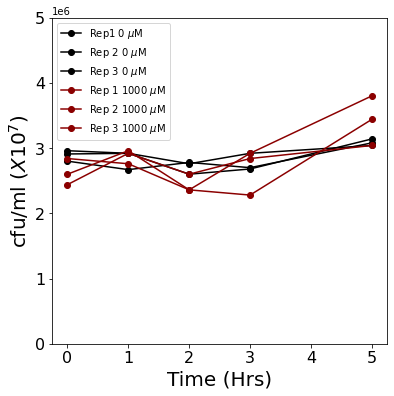

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the first plot
data1 = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'Rep1 0 $\mu$M': [2910000, 2920000, 2600000, 2680000, 3140000],
    'Rep 2 0 $\mu$M': [2800000,2670000, 2780000, 2700000,  3080000],
    'Rep 3 0 $\mu$M': [2960000, 2920000, 2760000, 2920000, 3040000],
}
# Data for the second plot
data2 = {
    'Time (Hrs)': [0, 1, 2, 3, 5],
    'Rep 1 1000 $\mu$M': [2600000,   2960000, 2360000 , 2920000 , 3800000],
    'Rep 2 1000 $\mu$M': [2440000, 2920000, 2600000,  2840000, 3040000],
    'Rep 3 1000 $\mu$M': [2840000,  2760000,  2360000, 2280000 ,3440000  ],
}


# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Plotting both datasets
plt.figure(figsize=(6, 6))
for col in df1.columns[1:]:
    plt.plot(df1['Time (Hrs)'], df1[col], marker='o', linestyle='-', label=col, color='black')

for col in df2.columns[1:]:
    plt.plot(df2['Time (Hrs)'], df2[col], marker='o', linestyle='-', label=col, color='darkred')

plt.xlabel('Time (Hrs)', size='20')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(0, 5e6)  # Set y-axis limit
plt.grid(False)   # Remove gridlines
plt.ylabel('cfu/ml ($X 10^7$)', size='20')
plt.legend()
plt.savefig('CFU graph_1000Um', dpi=400)
plt.show()



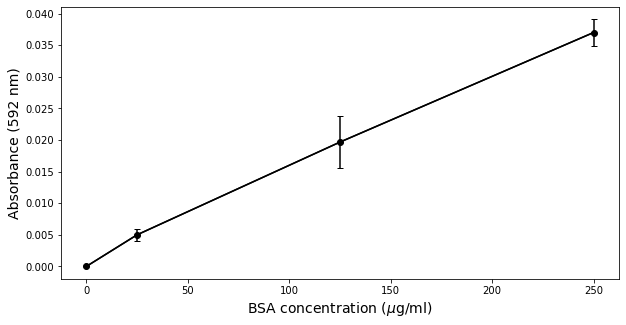

In [77]:
#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("Standard curves.xlsx", sheet_name='Tris_protein_SC')
read_file.to_csv ("Tris_protein_SC.csv", index = None,header=True)
Tris_protein_SC = pd.DataFrame(pd.read_csv("Tris_protein_SC.csv"))

Tris_protein_SC.drop([0,1,2,3,4], axis=0, inplace=True)
Tris_protein_SC.round(3)

fig, ax1 = plt.subplots(figsize=(10,5))

x1 = Tris_protein_SC['BSA final concentration (ug/ml)']
y1 = Tris_protein_SC['Average Abs']
y1error = Tris_protein_SC['STERR'] 
plt.plot(x1,y1, color='black', marker = 'o', label='0 $\mu$M $H_{2}O_{2}$')
plt.errorbar(x1,y1,yerr=y1error, color='black', capsize=3)
 
ax1.set_ylabel(r'Absorbance (592 nm)', size=14)
ax1.set_xlabel(r'BSA concentration ($\mu$g/ml)', size=14)

plt.savefig('tris Std curve')
plt.show()

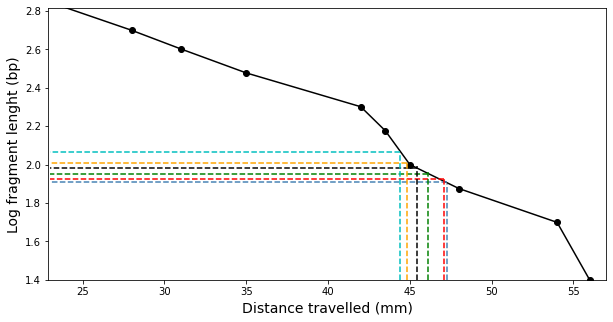

In [246]:
#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("Standard curves.xlsx", sheet_name='DNA_qpcr_SC')
read_file.to_csv ("DNA_qpcr_SC.csv", index = None,header=True)
DNA_qpcr_SC = pd.DataFrame(pd.read_csv("DNA_qpcr_SC.csv"))

#Tris_protein_SC.drop([0,1,2,3,4], axis=0, inplace=True)
DNA_qpcr_SC.round(3)

fig, ax1 = plt.subplots(figsize=(10,5))
trans = ax1.get_xaxis_transform()
x1 = DNA_qpcr_SC['Distance']
y1 = DNA_qpcr_SC['Log bp']
#y1error = Tris_protein_SC['STERR'] 
plt.plot(x1,y1, color='k', marker = 'o', label='DNA standard')
ax1.set_xlim(22.9,57)
ax1.set_ylim(1.4,2.815)
#plt.errorbar(x1,y1,yerr=y1error, color='black', capsize=3)
ax1.plot([47.3,23],[0.36,0.36], color="steelblue",linestyle='--', transform=trans, clip_on=False)
ax1.vlines(47.3, 1.4, 1.9, color='steelblue', linestyle='--',label='$ctt1$')

ax1.plot([47.1,23],[0.37,0.37], color="r",linestyle='--',label='$srx1$', transform=trans, clip_on=False)
ax1.vlines(47.1, 1.4, 1.93, color='r', linestyle='--')

ax1.plot([46.1,23],[0.388,0.388], color="g",linestyle='--',label='$trr1$', transform=trans, clip_on=False)
ax1.vlines(46.1, 1.4, 1.96, color='g', linestyle='--')

ax1.plot([45.45,23],[0.41,0.41], color="k",linestyle='--',label='$atf1$', transform=trans, clip_on=False)
ax1.vlines(45.45, 1.4, 1.99, color='k', linestyle='--')

ax1.plot([44.4,23],[0.47,0.47], color="c",linestyle='--',label='$act1$', transform=trans, clip_on=False)
ax1.vlines(44.4, 1.4, 2.05, color='c', linestyle='--')

ax1.plot([44.8,23],[0.43,0.43], linestyle='--',label='$gpd3$',color="orange", transform=trans, clip_on=False)
ax1.vlines(44.8, 1.4, 2.02, color='orange', linestyle='--')

#ax1.legend(['DNA standard','$ctt1$','$srx1$','$trr1$','$atf1$','$act1$','$gpd3$'], frameon=False)

ax1.set_ylabel(r'Log fragment lenght (bp)', size=14)
ax1.set_xlabel(r'Distance travelled (mm)', size=14)

plt.savefig('DNA standard curve low range')
plt.show()

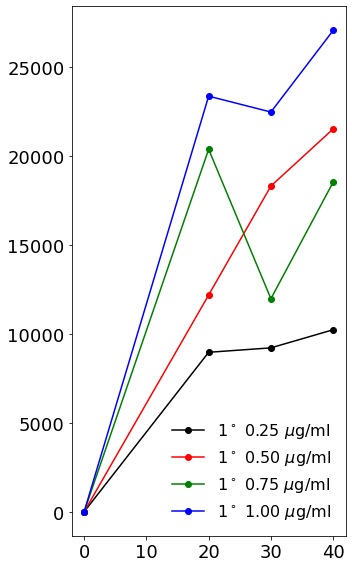

In [30]:
#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("Standard curves.xlsx", sheet_name='WB_linear_range')
read_file.to_csv ("WB_linear_range.csv", index = None,header=True)
WB_linear_range = pd.DataFrame(pd.read_csv("WB_linear_range.csv"))

#WB_linear_range.drop([0,1,2,3,4], axis=0, inplace=True)
WB_linear_range.round(3)

fig, ax1 = plt.subplots(figsize=(5,8))

x1 = WB_linear_range['Protein']
y1 = WB_linear_range['Intensity_1']

x2 = WB_linear_range['Protein']
y2 = WB_linear_range['Intensity_2']

x3 = WB_linear_range['Protein']
y3 = WB_linear_range['Intensity_3']


x4 = WB_linear_range['Protein']
y4 = WB_linear_range['Intensity_4']

plt.plot(x1,y1, color='black',marker='o', label='1 0.25 $\mu$g/ml')
plt.plot(x2,y2, color='red', marker='o', label='1 0.50 $\mu$g/ml')
plt.plot(x3,y3, color='green',marker='o', label='1 0.75 $\mu$g/ml')
plt.plot(x4,y4, color='blue', marker='o', label='1 1.00 $\mu$g/ml')
#plt.errorbar(x1,y1,yerr=y1error, color='black', capsize=3)
 
#ax1.set_ylabel(r'Densotromic intensity', size=14)
#ax1.set_xlabel(r'Total protein concentration ($\mu$g/ml)', size=12)
ax1.legend(['1$^\circ$ 0.25 $\mu$g/ml','1$^\circ$ 0.50 $\mu$g/ml', '1$^\circ$ 0.75 $\mu$g/ml', '1$^\circ$ 1.00 $\mu$g/ml'], fontsize=16,frameon=False)
ax1.tick_params(axis='both', labelsize=18)
plt.tight_layout()
plt.savefig('Dot blot analysis 1')
plt.show()

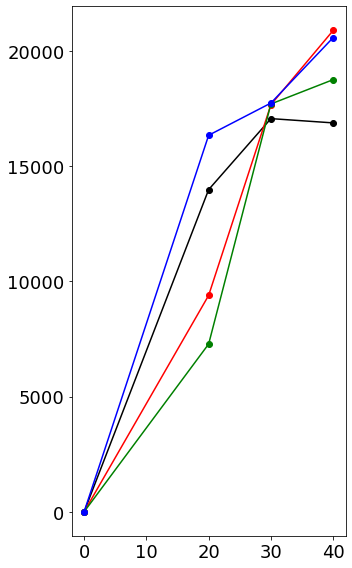

In [31]:
#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("Standard curves.xlsx", sheet_name='WB_linear_range')
read_file.to_csv ("WB_linear_range.csv", index = None,header=True)
WB_linear_range = pd.DataFrame(pd.read_csv("WB_linear_range.csv"))

#WB_linear_range.drop([0,1,2,3,4], axis=0, inplace=True)
WB_linear_range.round(3)

fig, ax1 = plt.subplots(figsize=(5,8))

x1 = WB_linear_range['Protein']
y1 = WB_linear_range['Intensity_5']

x2 = WB_linear_range['Protein']
y2 = WB_linear_range['Intensity_6']

x3 = WB_linear_range['Protein']
y3 = WB_linear_range['Intensity_7']


x4 = WB_linear_range['Protein']
y4 = WB_linear_range['Intensity_8']

plt.plot(x1,y1, color='black',marker='o', label='1 0.25 $\mu$g/ml')
plt.plot(x2,y2, color='red',marker='o', label='1 0.50 $\mu$g/ml')
plt.plot(x3,y3, color='green',marker='o', label='1 0.75 $\mu$g/ml')
plt.plot(x4,y4, color='blue',marker='o', label='1 1.00 $\mu$g/ml')
#plt.errorbar(x1,y1,yerr=y1error, color='black', capsize=3)
 
#ax1.set_ylabel(r'Densotromic intensity', size=14)
#ax1.set_xlabel(r'Total protein concentration ($\mu$g/ml)', size=12)
#ax1.legend(['1$^\circ$ 0.25 $\mu$g/ml','1$^\circ$ 0.50 $\mu$g/ml', '1$^\circ$ 0.75 $\mu$g/ml', '1$^\circ$ 1.00 $\mu$g/ml'],fontsize=16, frameon=False)
ax1.tick_params(axis='both', labelsize=18)
plt.tight_layout()
plt.savefig('Dot blot analysis 2')
plt.show()

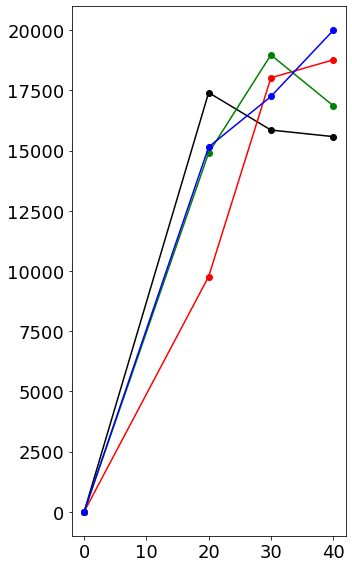

In [32]:
#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("Standard curves.xlsx", sheet_name='WB_linear_range')
read_file.to_csv ("WB_linear_range.csv", index = None,header=True)
WB_linear_range = pd.DataFrame(pd.read_csv("WB_linear_range.csv"))

#WB_linear_range.drop([0,1,2,3,4], axis=0, inplace=True)
WB_linear_range.round(3)

fig, ax1 = plt.subplots(figsize=(5,8))

x1 = WB_linear_range['Protein']
y1 = WB_linear_range['Intensity_9']

x2 = WB_linear_range['Protein']
y2 = WB_linear_range['Intensity_10']

x3 = WB_linear_range['Protein']
y3 = WB_linear_range['Intensity_11']


x4 = WB_linear_range['Protein']
y4 = WB_linear_range['Intensity_12']

plt.plot(x1,y1, color='black',marker='o', label='1 0.25 $\mu$g/ml')
plt.plot(x2,y2, color='red',marker='o', label='1 0.50 $\mu$g/ml')
plt.plot(x3,y3, color='green',marker='o', label='1 0.75 $\mu$g/ml')
plt.plot(x4,y4, color='blue',marker='o', label='1 1.00 $\mu$g/ml')
#plt.errorbar(x1,y1,yerr=y1error, color='black', capsize=3)
 
#ax1.set_ylabel(r'Densotromic intensity', size=14)
#ax1.set_xlabel(r'Total protein concentration ($\mu$g/ml)', size=12)
#ax1.legend(['1$^\circ$ 0.25 $\mu$g/ml','1$^\circ$ 0.50 $\mu$g/ml', '1$^\circ$ 0.75 $\mu$g/ml', '1$^\circ$ 1.00 $\mu$g/ml'], fontsize=16, frameon=False)
ax1.tick_params(axis='both', labelsize=18)
plt.tight_layout()
plt.savefig('Dot blot analysis 3')
plt.show()

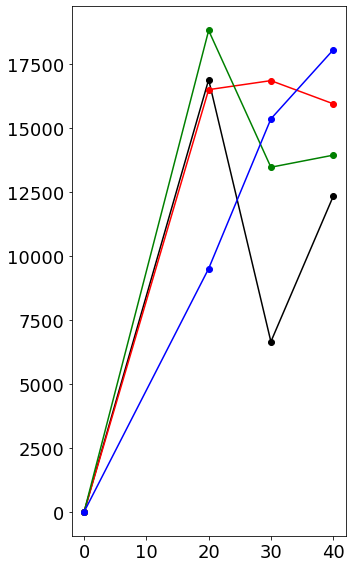

In [33]:
#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("Standard curves.xlsx", sheet_name='WB_linear_range')
read_file.to_csv ("WB_linear_range.csv", index = None,header=True)
WB_linear_range = pd.DataFrame(pd.read_csv("WB_linear_range.csv"))

#WB_linear_range.drop([0,1,2,3,4], axis=0, inplace=True)
WB_linear_range.round(3)

fig, ax1 = plt.subplots(figsize=(5,8))

x1 = WB_linear_range['Protein']
y1 = WB_linear_range['Intensity_13']

x2 = WB_linear_range['Protein']
y2 = WB_linear_range['Intensity_14']

x3 = WB_linear_range['Protein']
y3 = WB_linear_range['Intensity_15']


x4 = WB_linear_range['Protein']
y4 = WB_linear_range['Intensity_16']

plt.plot(x1,y1, color='black',marker='o', label='1 0.25 $\mu$g/ml')
plt.plot(x2,y2, color='red',marker='o', label='1 0.50 $\mu$g/ml')
plt.plot(x3,y3, color='green',marker='o', label='1 0.75 $\mu$g/ml')
plt.plot(x4,y4, color='blue',marker='o', label='1 1.00 $\mu$g/ml')
#plt.errorbar(x1,y1,yerr=y1error, color='black', capsize=3)
 
#ax1.set_ylabel(r'Densotromic intensity', size=14)
#ax1.set_xlabel(r'Total protein concentration ($\mu$g/ml)', size=12)
#ax1.legend(['1$^\circ$ 0.25 $\mu$g/ml','1$^\circ$ 0.50 $\mu$g/ml', '1$^\circ$ 0.75 $\mu$g/ml', '1$^\circ$ 1.00 $\mu$g/ml'], fontsize=16, frameon=False)
ax1.tick_params(axis='both', labelsize=18)
plt.tight_layout()
plt.savefig('Dot blot analysis 4')
plt.show()

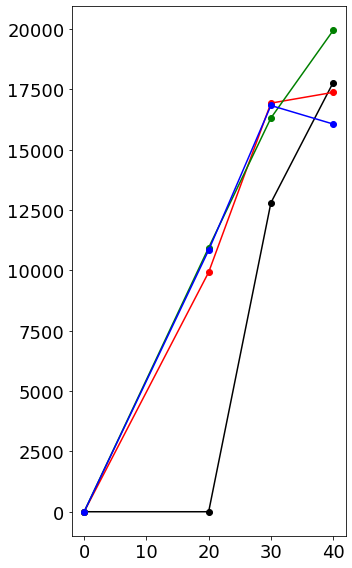

In [34]:
#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("Standard curves.xlsx", sheet_name='WB_linear_range')
read_file.to_csv ("WB_linear_range.csv", index = None,header=True)
WB_linear_range = pd.DataFrame(pd.read_csv("WB_linear_range.csv"))

#WB_linear_range.drop([0,1,2,3,4], axis=0, inplace=True)
WB_linear_range.round(3)

fig, ax1 = plt.subplots(figsize=(5,8))

x1 = WB_linear_range['Protein']
y1 = WB_linear_range['Intensity_17']

x2 = WB_linear_range['Protein']
y2 = WB_linear_range['Intensity_18']

x3 = WB_linear_range['Protein']
y3 = WB_linear_range['Intensity_19']


x4 = WB_linear_range['Protein']
y4 = WB_linear_range['Intensity_20']

plt.plot(x1,y1, color='black',marker='o', label='1 0.25 $\mu$g/ml')
plt.plot(x2,y2, color='red',marker='o', label='1 0.50 $\mu$g/ml')
plt.plot(x3,y3, color='green',marker='o', label='1 0.75 $\mu$g/ml')
plt.plot(x4,y4, color='blue',marker='o', label='1 1.00 $\mu$g/ml')
#plt.errorbar(x1,y1,yerr=y1error, color='black', capsize=3)
 
#ax1.set_ylabel(r'Densotromic intensity', size=14)
#ax1.set_xlabel(r'Total protein concentration ($\mu$g/ml)', size=12)
#ax1.legend(['1$^\circ$ 0.25 $\mu$g/ml','1$^\circ$ 0.50 $\mu$g/ml', '1$^\circ$ 0.75 $\mu$g/ml', '1$^\circ$ 1.00 $\mu$g/ml'],fontsize=16, frameon=False)
ax1.tick_params(axis='both', labelsize=18)
plt.tight_layout()
plt.savefig('Dot blot analysis 5')
plt.show()

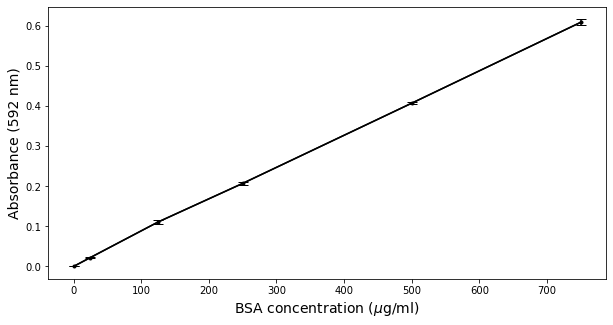

In [288]:
#Call in excel file and specify sheet name. Convert the sheet into a csv file and work with the data from there.
read_file = pd.read_excel ("Standard curves.xlsx", sheet_name='PBS_protein_SC')
read_file.to_csv ("PBS_protein_SC.csv", index = None,header=True)
PBS_protein_SC = pd.DataFrame(pd.read_csv("PBS_protein_SC.csv"))

PBS_protein_SC.drop([0,1,2,], axis=0, inplace=True)
PBS_protein_SC.round(3)

fig, ax1 = plt.subplots(figsize=(10,5))

x1 = PBS_protein_SC['BSA final concentration (ug/ml)']
y1 = PBS_protein_SC['Average Abs']
y1error = PBS_protein_SC['STERR'] 
plt.plot(x1,y1, color='black', marker = '.')
plt.errorbar(x1,y1,yerr=y1error, color='black', capsize=5)
 
ax1.set_ylabel(r'Absorbance (592 nm)', size=14)
ax1.set_xlabel(r'BSA concentration ($\mu$g/ml)', size=14)

plt.savefig('PBS Std curve')
plt.show()

In [ ]:
#fig=plt.figure(figsize=(33,8))

x = np.arange(4)
sig_amp1, error1 = ([0.787, 0.562, 0.504, 0.309]),([0.035, 0.055, 0.117, 0.124])

sig_amp2, error2 = ([0.7485, 0.983, 0.812, 1.0495]),([0.0645, 0.162, 0.093, 0.1465])

sig_amp3, error3 = ([0.16, 0.14, 0.135, 0.179333333]),([0.014, 0.03, 0.017, 0.039733837])
ax = fig.add_subplot(131)                  
               
width=0.25

#fig=plt.figure(figsize=(7,6))

# plot data in grouped manner of bar type
plt.bar(x-0.25, sig_amp1,width, color='black',yerr=error1)
plt.bar(x+0.0, sig_amp2,width, color='red', yerr=error2)
plt.bar(x+0.25, sig_amp3,width, color='blue', yerr=error3)

plt.ylim(0,2)
plt.xticks(x, ['100', '200', '500', '1000'])
plt.xlabel("$H_{2}O_{2}$ ($\mu$M)")
plt.ylabel("Signalling amplitude")
plt.legend(['$Pap1_{ox}/Pap_{total}$','$Pap1_{ox}/DTT$','$Pap1_{ox}/Total protein$'],loc='upper left', frameon=False)
#trans = ax.get_xaxis_transform()
plt.plot([-0.05,0.29],[0.35,0.35], color="k", transform=trans, clip_on=False, lw=0.5)
plt.annotate('ns',xy=(0.1, 0.46), xycoords='axes fraction', size=11)
plt.plot([-0.05,0.39],[0.42,0.42], color="k", transform=trans, clip_on=False, lw=0.5)
plt.annotate('***',xy=(0.1, 0.54), xycoords='axes fraction', size=11)

plt.plot([0.58,0.89],[0.4,0.4], color="k", transform=trans, clip_on=False, lw=0.5)
plt.annotate('*',xy=(0.34, 0.51), xycoords='axes fraction', size=11)
plt.plot([0.58,1],[0.48,0.48], color="k", transform=trans, clip_on=False, lw=0.5)
plt.annotate('***',xy=(0.35, 0.62), xycoords='axes fraction', size=11)

plt.plot([1.18,1.49],[0.37,0.37], color="k", transform=trans, clip_on=False, lw=0.5)
plt.annotate('*',xy=(0.59, 0.47), xycoords='axes fraction', size=11)
plt.plot([1.18,1.6],[0.43,0.43], color="k", transform=trans, clip_on=False, lw=0.5)
plt.annotate('***',xy=(0.58, 0.55), xycoords='axes fraction', size=11)

plt.plot([1.8,2.1],[0.45,0.45], color="k", transform=trans, clip_on=False, lw=0.5)
plt.annotate('*',xy=(0.83, 0.57), xycoords='axes fraction', size=11)
plt.plot([1.8,2.25],[0.5,0.5], color="k", transform=trans, clip_on=False, lw=0.5)
plt.annotate('ns',xy=(0.85, 0.65), xycoords='axes fraction', size=11)

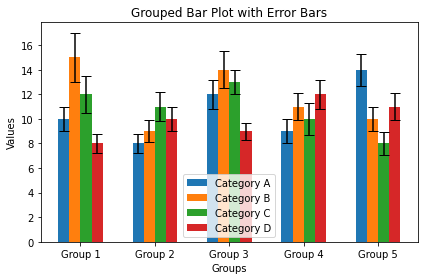

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define your groups and categories
groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
categories = ['Category A', 'Category B', 'Category C', 'Category D']

# Manually enter your data values and corresponding error values (replace these with your actual data)
values = np.array([
    [10, 15, 12, 8],
    [8, 9, 11, 10],
    [12, 14, 13, 9],
    [9, 11, 10, 12],
    [14, 10, 8, 11]
])

# Corresponding error values (replace these with your actual error values)
errors = np.array([
    [1, 2, 1.5, 0.8],
    [0.8, 0.9, 1.2, 1.0],
    [1.2, 1.5, 1.0, 0.7],
    [1.0, 1.1, 1.3, 1.2],
    [1.3, 1.0, 0.9, 1.1]
])

# Width of each bar
bar_width = 0.15

# Set the positions of the bars on the x-axis
x = np.arange(len(groups))

# Create the grouped bar plot with error bars
fig, ax = plt.subplots()

for i, category in enumerate(categories):
    bar_positions = x + i * bar_width
    ax.bar(bar_positions, values[:, i], width=bar_width, label=category, yerr=errors[:, i], capsize=5)  # Add error bars

# Labeling and customization
ax.set_xlabel('Groups')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Plot with Error Bars')
ax.set_xticks(x + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(groups)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
